In [1]:
%cd ..

/Users/treycole/Codes/WanPy


In [2]:
from junk import WanPy_slow as WPs

In [3]:
from WanPy.WanPy import *
import WanPy.models as models
import WanPy.plotting as plot

from pythtb import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sympy as sp 
import scipy

In [4]:
# delta = 1
# t = -1
# t2 = 0.2

# model = models.Haldane(delta, t, t2).make_supercell([[2,0], [0,2]])

delta = 1
t0 = 0.4
tprime = 0.5

model = models.chessboard(t0, tprime, delta).make_supercell([[2,0], [0,2]])

orbs = model.get_orb()
n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)
lat_vecs = model.get_lat() # lattice vectors
low_E_sites = np.arange(0, n_orb, 2)
high_E_sites = np.arange(1, n_orb, 2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

sv_dir = 'data'
save_prefix=f'C={chern:.1f}_Delta={delta}_t0={t0}_tprime={tprime}'

iter_num_omega_i = 10000
iter_num_omega_til = 10000

In [78]:
# random start 1
w0 = np.load(f"data/W0_max_loc_C=-1.0_Delta=1_t0=0.4_tprime=0.5_tfxs=rand_2=10000_iter_num_omega_til=10000.npy")
# random start 2
w02 = np.load("data/W0_max_loc_C=-1.0_Delta=1_t0=0.4_tprime=0.5_tfxs=rand_iter_num_omega_i=5000_iter_num_omega_til=5000.npy")

sp.Matrix(get_overlap_mat(w0, w02).round(5))

Matrix([
[0.9261 - 0.37727*I,    1.0e-5 + 2.0e-5*I,  -1.0e-5 + 2.0e-5*I],
[-1.0e-5 - 2.0e-5*I, -0.95251 + 0.30452*I,              1.0e-5],
[ 1.0e-5 + 1.0e-5*I,               1.0e-5, 0.99857 - 0.05353*I]])

In [80]:
abs(get_overlap_mat(w0, w02)[0,0])**2

0.9999999339910455

In [79]:
u_wfs = np.load("data/u_wfs_max_loc_C=-1.0_Delta=1_t0=0.4_tprime=0.5_tfxs=rand_iter_num_omega_i=5000_iter_num_omega_til=5000.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'data/u_wfs_max_loc_C=-1.0_Delta=1_t0=0.4_tprime=0.5_tfxs=rand_iter_num_omega_i=5000_iter_num_omega_til=5000.npy'

Center [0. 1.]


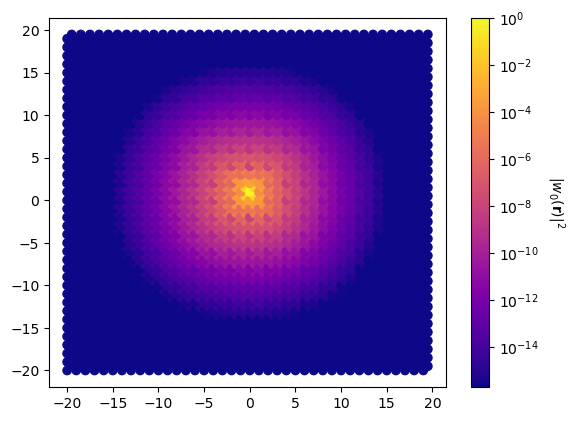

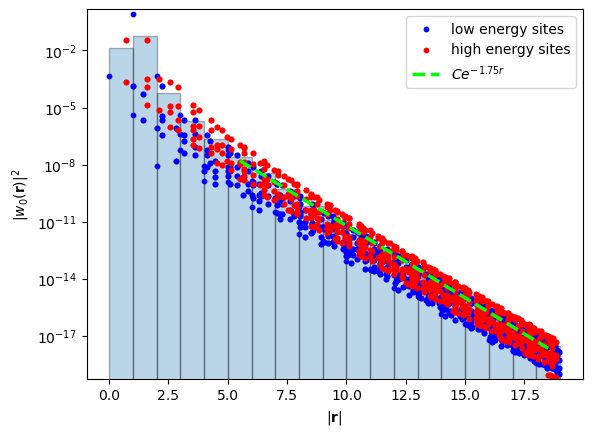

([<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 1 Axes>],
 [<Axes: >, <Axes: xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

In [68]:
idx = 0
omit_site = 0

print(f"Center {expc_r[idx].round(7)}")
plot.plot_Wan(w0, idx, orbs, lat_vecs, plot_decay=True, show=True)

In [16]:
omit_sites_list = [0, 2, 4, 6, 'rand']
w0 = {}
expc_r = {}
u_wfs_mac_loc = {}

for omit_sites in omit_sites_list:
    if isinstance(omit_sites, int):
        tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
        sv_tail = f'tfxs={tf_list}_iter_num_omega_i={iter_num_omega_i}_iter_num_omega_til={iter_num_omega_til}.npy'
        w0[omit_sites] = np.load(f"{sv_dir}/W0_max_loc_{save_prefix}_{sv_tail}")
        expc_r[omit_sites] = np.load(f"{sv_dir}/W0_max_loc_cntrs_{save_prefix}_{sv_tail}")
        u_wfs_mac_loc[omit_sites]= np.load(f"{sv_dir}/u_wfs_max_loc_{save_prefix}_{sv_tail}")
    else:
        sv_tail = f'tfxs={omit_sites}_iter_num_omega_i={iter_num_omega_i}_iter_num_omega_til={iter_num_omega_til}.npy'
        w0[omit_sites] = np.load(f"{sv_dir}/W0_max_loc_{save_prefix}_{sv_tail}")
        expc_r[omit_sites] = np.load(f"{sv_dir}/W0_max_loc_cntrs_{save_prefix}_{sv_tail}")

Center [0. 1.]


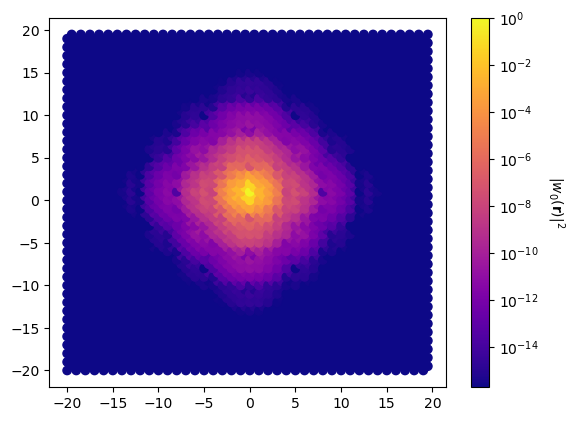

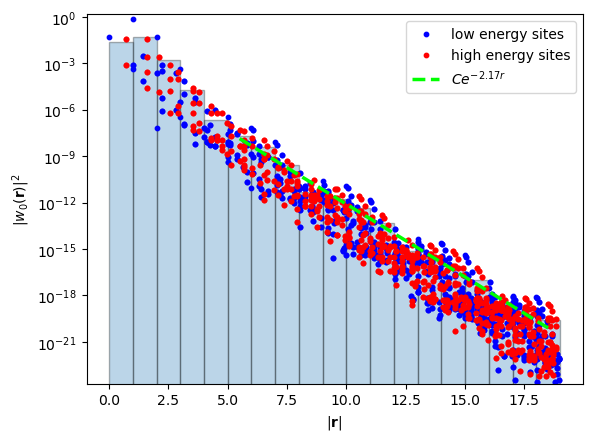

([<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 1 Axes>],
 [<Axes: >, <Axes: xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

In [62]:
idx = 0
omit_site = 0

print(f"Center {expc_r[omit_site][idx].round(7)}")
plot.plot_Wan(w0[omit_site], idx, orbs, lat_vecs, plot_decay=True, show=True)

$$O_{n,m} = \langle w_{n} | w_m' \rangle$$

In [18]:
def get_overlap_mat(w0, w1):
    overlap_mat = np.zeros((w0.shape[-2], w1.shape[-2]), dtype=complex)
    for n in range(w0.shape[-2]):
        for m in range(w1.shape[-2]):
            overlap_mat[n, m] = np.sum(np.vdot(w0[..., n, :], w1[..., m, :]))

    return overlap_mat

# def C2(w0):
#     w0[..., :, [2, 4]] = w0[..., :, [4,2]]
#     return np.transpose(w0, axes=(1,0,2,3))

In [19]:
overlap = {}

for omit_sites_1 in omit_sites_list:
    w_1 = w0[omit_sites_1]
    for omit_sites_2 in omit_sites_list:
        w_2 = w0[omit_sites_2]
        overlap[omit_sites_1, omit_sites_2] = get_overlap_mat(w_1, w_2)

In [20]:
sp.Matrix(overlap[0,2].round(5))

Matrix([
[             0.36004, -0.09255 + 0.00045*I,  0.17855],
[             0.17855,              0.96565, -0.00794],
[-0.09255 + 0.00045*I,              0.05001,  0.96565]])

In [33]:
sp.Matrix(overlap[4, 'rand'].round(5))

Matrix([
[-0.34105 + 0.11538*I,  0.09157 - 0.01344*I, 0.17761 + 0.01839*I],
[ 0.08752 - 0.03009*I, -0.04951 + 0.00702*I, 0.96052 + 0.09944*I],
[-0.16914 + 0.05722*I, -0.95609 + 0.13553*I, -0.0079 - 0.00082*I]])